In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\ayush\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [2]:
pip install opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\ayush\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [3]:
import cv2
import numpy as np

In [4]:
imgPath = r"custom/pasta.jpg"

[Read more about imread](https://www.geeksforgeeks.org/python-opencv-cv2-imread-method/)

In [5]:
img = cv2.imread(imgPath)
#img = cv2.imread(imgPath, cv2.IMREAD_COLOR) #path, flag
img

array([[[  0,   0,  10],
        [  0,   0,   9],
        [  0,   0,  10],
        ...,
        [ 19,  79, 169],
        [ 20,  80, 170],
        [ 19,  79, 169]],

       [[  0,   1,  11],
        [  0,   1,  11],
        [  0,   1,  11],
        ...,
        [ 19,  81, 171],
        [ 19,  81, 171],
        [ 18,  80, 170]],

       [[  0,   2,  10],
        [  0,   2,  10],
        [  0,   1,  11],
        ...,
        [ 19,  82, 172],
        [ 18,  81, 171],
        [ 18,  81, 171]],

       ...,

       [[ 20,  37,  63],
        [ 18,  35,  61],
        [ 20,  34,  62],
        ...,
        [  8,   0,  11],
        [  9,   0,  10],
        [  6,   1,  10]],

       [[ 22,  39,  66],
        [ 20,  37,  64],
        [ 19,  36,  63],
        ...,
        [  6,   0,  11],
        [  6,   0,  11],
        [  4,   0,  11]],

       [[ 23,  40,  67],
        [ 23,  40,  67],
        [ 22,  38,  67],
        ...,
        [  0,   2,  10],
        [  1,   0,  10],
        [  0,   0,  10]]

In [6]:
h, w, c = img.shape
print("Dimensions of the image is:nnHeight:", h, " pixelsnWidth:", w, " pixelsnNumber of Channels:", c)

Dimensions of the image is:nnHeight: 550  pixelsnWidth: 900  pixelsnNumber of Channels: 3


In [7]:
print(img.dtype), print(type(img))

uint8
<class 'numpy.ndarray'>


(None, None)

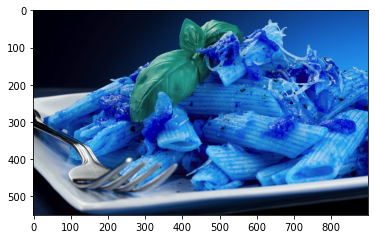

In [8]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.imshow(img)
plt.show()

In [9]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

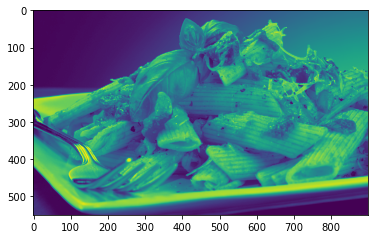

In [10]:
plt.imshow(gray)
plt.show()

In [11]:
def extract_bit_plane(cd):
    #  extracting all bit one by one 
    # from 1st to 8th in variable 
    # from c1 to c8 respectively 
    c1 = np.mod(cd, 2)
    c2 = np.mod(np.floor(cd/2), 2)
    c3 = np.mod(np.floor(cd/4), 2)
    c4 = np.mod(np.floor(cd/8), 2)
    c5 = np.mod(np.floor(cd/16), 2)
    c6 = np.mod(np.floor(cd/32), 2)
    c7 = np.mod(np.floor(cd/64), 2)
    c8 = np.mod(np.floor(cd/128), 2)
    # combining image again to form equivalent to original grayscale image 
    cc = 2 * (2 * (2 * c8 + c7) + c6) # reconstructing image  with 3 most significant bit planes
    to_plot = [cd, c1, c2, c3, c4, c5, c6, c7, c8, cc]
    fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(10, 8), subplot_kw={'xticks': [], 'yticks': []})
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for ax, i in zip(axes.flat, to_plot):
        ax.imshow(i, cmap='gray')
    plt.tight_layout()
    plt.show()
    return cc

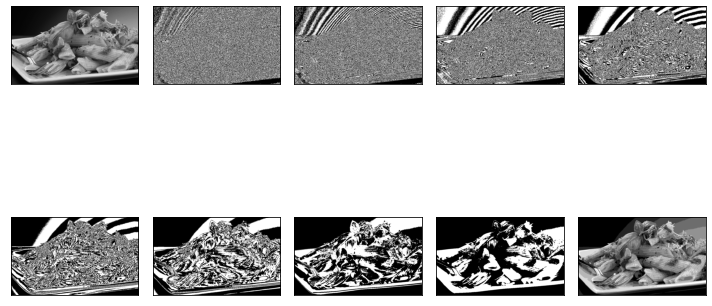

In [12]:
reconstructed_image = extract_bit_plane(gray)

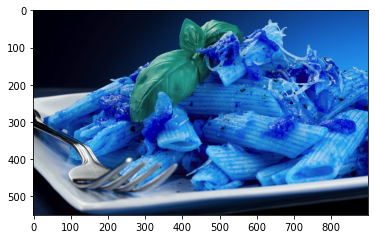

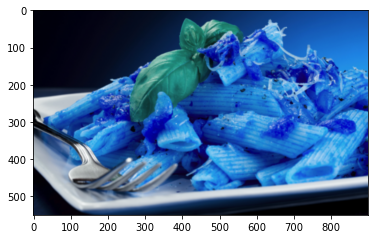

In [13]:
# Median Blur
# blur = cv2.medianBlur(img, 5)
# Gaussian Blur
blur = cv2.GaussianBlur(img, (5, 5), 0)
fig, ax = plt.subplots()

plt.imshow(img)
plt.show()

plt.imshow(blur)
plt.show()

(array([54482.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0., 

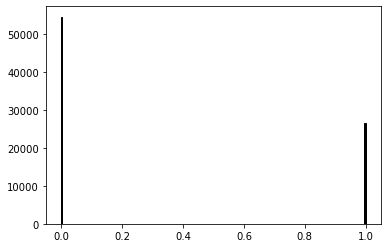

In [14]:
plt.hist(img.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k') #calculating histogram

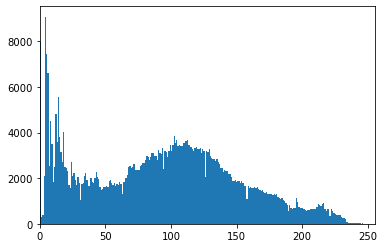

In [15]:
vals = blur.mean(axis=2).flatten()
# plot histogram with 255 bins
b, bins, patches = plt.hist(vals, 255)
plt.xlim([0,255])
plt.show()

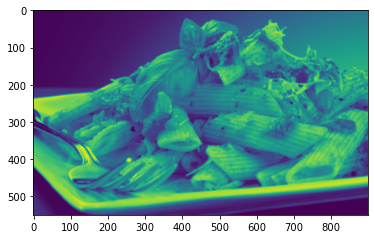

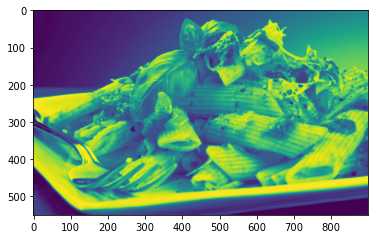

-1

In [16]:
# Histogram equalization

src = blur
src = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
dst = cv2.equalizeHist(src)
plt.imshow(src)
plt.show()
plt.imshow(dst)
plt.show()
cv2.waitKey()

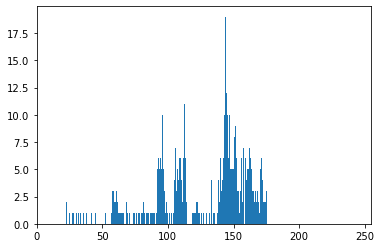

In [17]:
vals = dst.mean(axis=1).flatten()
# plot histogram with 255 bins
b, bins, patches = plt.hist(vals, 255)
plt.xlim([0,255])
plt.show()

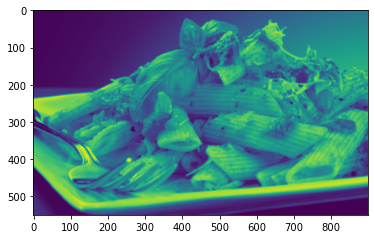

In [18]:
gray = cv2.cvtColor(blur,cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()

In [19]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

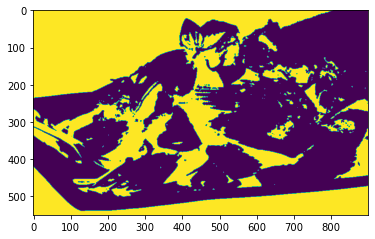

In [20]:
plt.imshow(thresh)
plt.show()

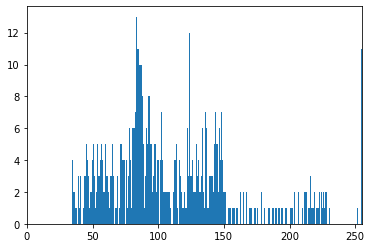

In [21]:
vals = thresh.mean(axis=1).flatten()
# plot histogram with 255 bins
b, bins, patches = plt.hist(vals, 255)
plt.xlim([0,255])
plt.show()

In [22]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(blur,markers)
blur[markers == -1] = [255,0,0]

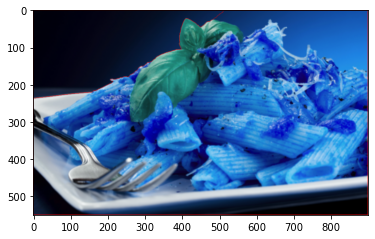

In [23]:
plt.imshow(blur)
plt.show()

In [24]:
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
a_component = lab[:,:,1]
th = cv2.threshold(a_component,140,255,cv2.THRESH_BINARY)[1]

In [25]:
blur = cv2.GaussianBlur(th,(13,13), 11)

In [26]:
heatmap_img = cv2.applyColorMap(blur, cv2.COLORMAP_JET)

In [27]:
super_imposed_img = cv2.addWeighted(heatmap_img, 0.5, img, 0.5, 0)

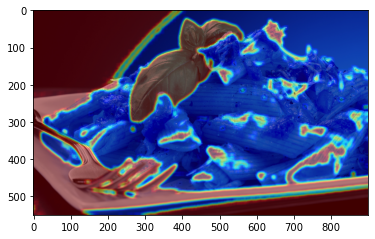

In [28]:
plt.imshow(super_imposed_img)
plt.show()

In [88]:
from sklearn.cluster import KMeans
import cv2
import numpy as np
import matplotlib.pyplot as plt

def generateHeatMap(img):
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    a_component = lab[:,:,1]
    th = cv2.threshold(a_component,140,255,cv2.THRESH_BINARY)[1]
    blur = cv2.GaussianBlur(th,(13,13), 11)
    heatmap_img = cv2.applyColorMap(blur, cv2.COLORMAP_JET)
    super_imposed_img = cv2.addWeighted(heatmap_img, 0.5, img, 0.5, 0)
    return super_imposed_img

img = cv2.imread('custom/fire.jpg')
hMapImg = generateHeatMap(img)

def visualize_Dominant_colors(cluster, C_centroids):
    result = []
    C_labels = np.arange(0, len(np.unique(cluster.labels_)) + 1)
    (C_hist, _) = np.histogram(cluster.labels_, bins = C_labels)
    C_hist = C_hist.astype("float")
    C_hist /= C_hist.sum()

    rect_color = np.zeros((50, 300, 3), dtype=np.uint8)
    img_colors = sorted([(percent, color) for (percent, color) in zip(C_hist, C_centroids)])
    start = 0
    for (percent, color) in img_colors:
        result.append([color, "{:0.2f}%".format(percent * 100)])
        end = start + (percent * 300)
        cv2.rectangle(rect_color, (int(start), 0), (int(end), 50), \
                      color.astype("uint8").tolist(), -1)
        start = end
    return result

# Load image
hMapImg = cv2.cvtColor(hMapImg, cv2.COLOR_BGR2RGB)
reshape_img = hMapImg.reshape((hMapImg.shape[0] * hMapImg.shape[1], 3))

# Display dominant colors Present in the image
KM_cluster = KMeans(n_clusters=5).fit(reshape_img)
result = visualize_Dominant_colors(KM_cluster, KM_cluster.cluster_centers_)
#visualize_color = cv2.cvtColor(visualize_color, cv2.COLOR_RGB2BGR)
percent = []

for elem in result:
    percent.append(float(elem[1][:len(elem[1])-1]))
    
for i, j in enumerate(percent):
    if j == max(percent):
        ind = i
        break

maxInd = np.argmax(result[ind][0], axis=0)

col = ['R', 'G', 'B']

print(col[maxInd])
# cv2.imshow('visualize_Color', visualize_color)
# cv2.waitKey()

R
